# Exploratory Data Analysis

The dataset ifood_df.csv consists of 2206 customers of XYZ company with data on:

Customer profiles

Product preferences

Campaign successes/failures

Channel performance

## Imports and kaggle.json file upload


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stamatiskal","key":"2b4b059b607428bc27c45b2af9eeee2b"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jackdaoud/marketing-data

  0% 0.00/643k [00:00<?, ?B/s]
100% 643k/643k [00:00<00:00, 77.7MB/s]


In [ ]:
! mkdir marketing_data
! unzip marketing-data.zip  -d marketing_data
! rm *.zip

Archive:  marketing-data.zip
  inflating: marketing_data/dictionary.png  
  inflating: marketing_data/ifood_df.csv  


## Data info

In [ ]:
data = pd.read_csv('/content/marketing_data/ifood_df.csv')

In [ ]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
data.shape

(2205, 39)

In [ ]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
num_data=data.select_dtypes(exclude=['object'])
num_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
cat_data = data.select_dtypes(include = ['object'])

In [ ]:
cat_data.head()

""
0
1
2
3
4


In [ ]:
num_data.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [ ]:
z = data[["Z_CostContact"]]
def unique(z):
    x = np.array(z)
    print(np.unique(x))
unique(data[["Z_CostContact"]])
unique(data[["Z_Revenue"]])

[3]
[11]


In [ ]:
data = data.drop(['Z_CostContact','Z_Revenue'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

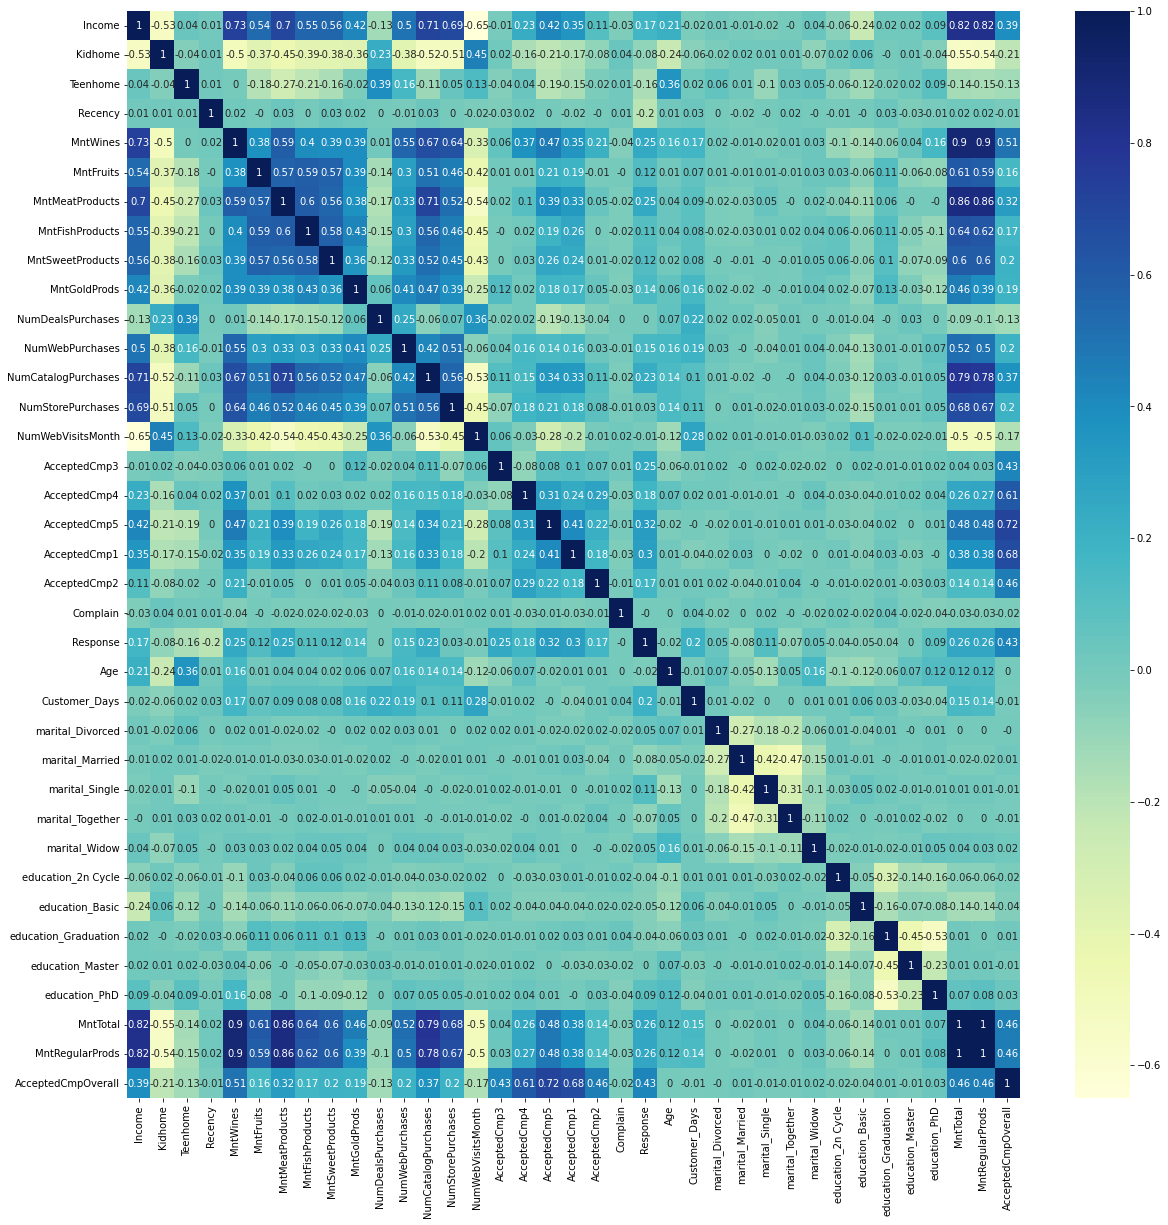

In [ ]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlGnBu")

###Hypotheses: 

#####From the corellation matrix above, me make the following hypotheses:
######1.   Correlation of deals purchased with a kid or teen home? ( Kidhome, Teenhome, NumDealsPurchases )
######2.   Does a person with higher income spend more for purchasing products? ( Income, MntTotal )
######3.   Which campaign helped was more successful at selling more products? ( AcceptedCmpOverall,MntTotal )
######4.  Does education matter when it comes to what purchases a person makes?  (education_Basic, education_Graduation, education_Master, education_PhD, MntFishProducts, MntMeatProducts, MntFruits, MntSweetProducts, MntWines, MntGoldProds )
######5. Does income correlates with what purchases are made? ( Income,  MntFishProducts, MntMeatProducts, MntFruits, MntSweetProducts, MntWines, MntGoldProds )

## Statistic Data Analysis

In [ ]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


As shown to the statistics analysis table above,


*   count: number of samples in each feature
*   mean: describes the median value of the selected feature
*   std: describes the positive square root of the selected feature variance
*   min, 25%, 50%, 75%, max: Interquartile range(IQR), describes the spread of the data(the median at each percentage of the selected feature).

Conclusions from the upper table:
* From mean row:
    1. Campaign 4 was the most accepted campaing because mean is higher than the other four campaign means.
    2. Families consume more wine than any other product.

* From std row: 
    1. Variance is low for most of the features except: Income, Recency, Total amount of products bought and for any other product bought.

* From IQR rows: 
    1.   Half of the families don't have any children.
    2.   From all campaigns, only 25% of each campaing was accepted.


## Hypothesis 1: Correlation of deals purchased with children at home?

Text(0.5, 1.0, 'Children at home vs amount of deals bought')

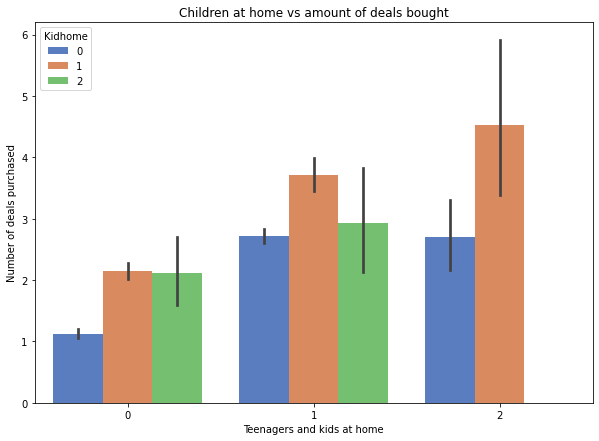

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
sns.barplot(y='NumDealsPurchases',x='Teenhome', hue='Kidhome', ax = ax,  data=data, palette='muted') 
plt.xlabel('Teenagers and kids at home')
plt.ylabel('Number of deals purchased')
plt.title('Children at home vs amount of deals bought')

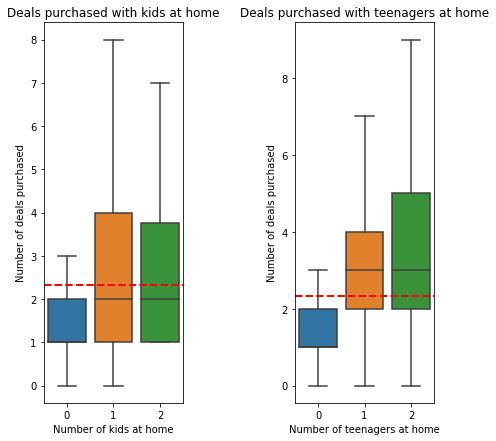

In [ ]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x=data.Kidhome, y=data.NumDealsPurchases, ax = ax1, showfliers=False)
plt.axhline(data.NumDealsPurchases.mean(),color='r',linestyle='dashed',linewidth=2)
plt.xlabel('Number of kids at home')
plt.ylabel('Number of deals purchased')
plt.title('Deals purchased with kids at home')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x=data.Teenhome, y=data.NumDealsPurchases, ax = ax2, showfliers=False)
plt.axhline(data.NumDealsPurchases.mean(),color='r',linestyle='dashed',linewidth=2)
plt.xlabel('Number of teenagers at home')
plt.ylabel('Number of deals purchased')
plt.title('Deals purchased with teenagers at home')

plt.subplots_adjust(wspace=0.8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


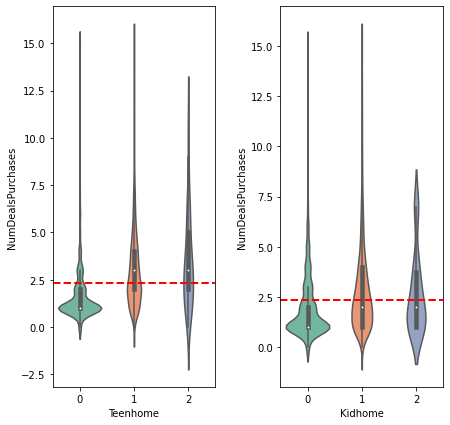

In [ ]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(1,2,1)
sns.violinplot('Teenhome', 'NumDealsPurchases', ax = ax1, data=data, palette="Set2")
plt.axhline(data.NumDealsPurchases.mean(),color='r',linestyle='dashed',linewidth=2)

ax2= fig.add_subplot(1,2,2)
sns.violinplot('Kidhome', 'NumDealsPurchases', ax = ax2, data=data, palette="Set2")
plt.axhline(data.NumDealsPurchases.mean(),color='r',linestyle='dashed',linewidth=2)

plt.subplots_adjust(wspace=0.4)

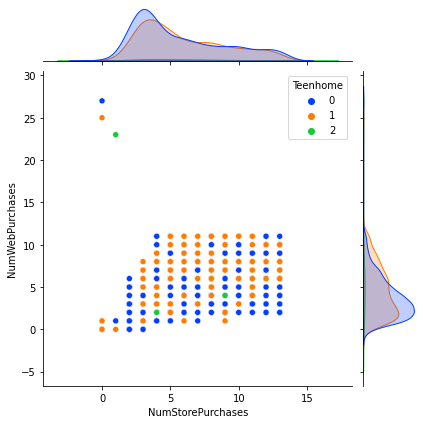

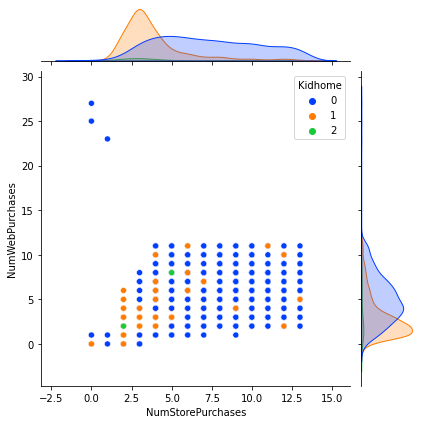

In [ ]:
sns.jointplot(x='NumStorePurchases', y='NumWebPurchases',data=data,hue='Teenhome',palette='bright')
plt.show()
sns.jointplot(x='NumStorePurchases', y='NumWebPurchases',data=data,hue='Kidhome',palette='bright')
plt.show()

Answer: Families with more children at home, especially teenages, tend to buy more deals. Also, from the last plot above, more web purchases and store purchases are made when there are more teenagers at home.

## Hypothesis 2:  Does a person with higher income spend more for purchasing products?

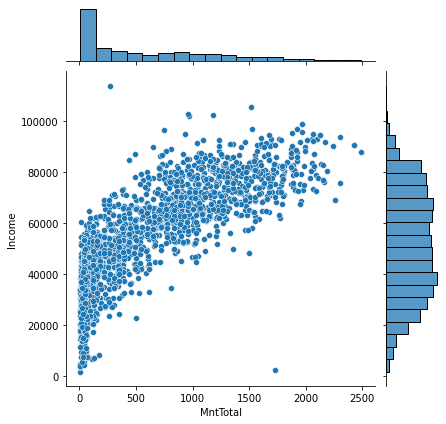

In [ ]:
sns.jointplot(x='MntTotal', y='Income', data=data)

Text(0.5, 1.0, 'Income Vs Total Amount bought')

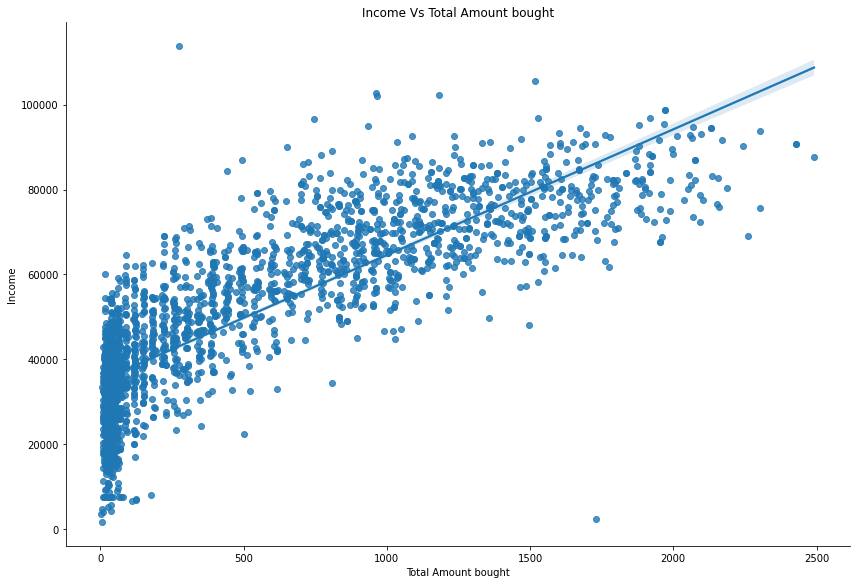

In [ ]:
sns.lmplot(data = data, x= 'MntTotal', y ='Income', height=8, aspect=1.5, palette = 'deep')
plt.xlabel('Total Amount bought')
plt.ylabel('Income')
plt.title('Income Vs Total Amount bought')

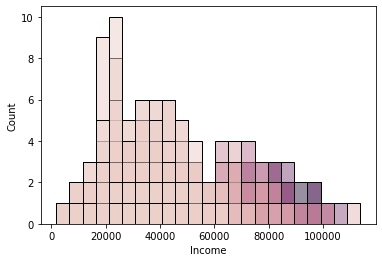

In [ ]:
sns.histplot(hue='MntTotal', x ='Income', data = data, legend = False)

Answer: People with higher income tend to buy more(darker colors at higher income). Also, as concluded from the lmplot, the line indicates a rise of amount bought, as income increases.  

## Hypothesis 3:  Which campaign helped was more successful at selling more products?

In [ ]:
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
s1 = 0
s2 = 0
s3 = 0
s4 = 0
s5 = 0
for i in range(0,len(data)):
  if data.AcceptedCmpOverall[i] == 0:
    c1 += 1 
  elif data.AcceptedCmpOverall[i] == 1:
    c2 += 1
  elif data.AcceptedCmpOverall[i] == 2:
    c3 += 1
  elif data.AcceptedCmpOverall[i] == 3:
    c4 += 1
  elif data.AcceptedCmpOverall[i] == 4:
    c5 += 1

  if data.AcceptedCmp1[i] == 1:
    s1 += 1 
  elif data.AcceptedCmp2[i] == 1:
    s2 += 1
  elif data.AcceptedCmp3[i] == 1:
    s3 += 1
  elif data.AcceptedCmp4[i] == 1:
    s4 += 1
  elif data.AcceptedCmp5[i] == 1:
    s5 += 1
split = [c1/len(data), c2/len(data), c3/len(data), c4/len(data), c5/len(data)]
spli2 = [s1/len(data), s2/len(data), s3/len(data), s4/len(data), s5/len(data)]
names =['Campaign1 Accepted', 'Campaign2 Accepted', 'Campaign3 Accepted', 'Campaign4 Accepted', 'Campaign5 Accepted']
names2 = ['First Campaign', 'Second Campaign', 'Third Campaign', 'Fourth Campaign', 'Fifth Campaign']

In [ ]:
fig = px.pie( data_frame = data, values= spli2, names= names2, title='Percentage of each Campaign accepted seperately')
fig.show()

fig = px.pie( data_frame = data, values= split, names= names, title='Percentage of all Campaigns accepted overall')
fig.show()

Text(0.5, 1.0, 'Total Amount Bought Vs Accepted Campaigns Overall')

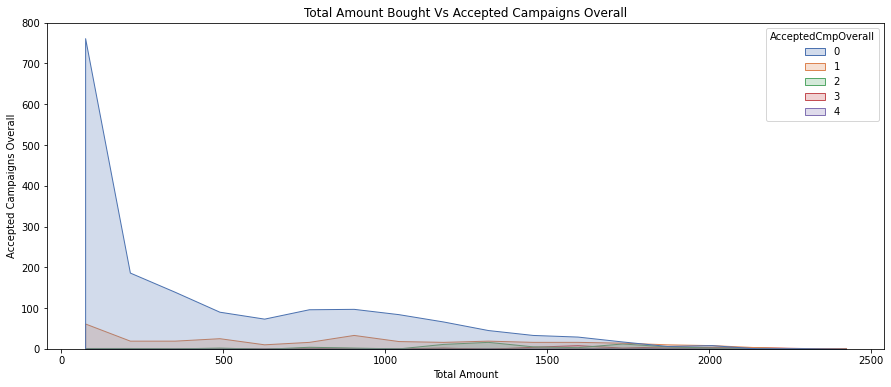

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
sns.histplot(hue='AcceptedCmpOverall', x = 'MntTotal',  data = data,element="poly", ax = ax, palette='deep')
plt.xlabel('Total Amount')
plt.ylabel('Accepted Campaigns Overall')
plt.title('Total Amount Bought Vs Accepted Campaigns Overall')

Text(0.5, 1.0, 'Campaings Accepted Overall')

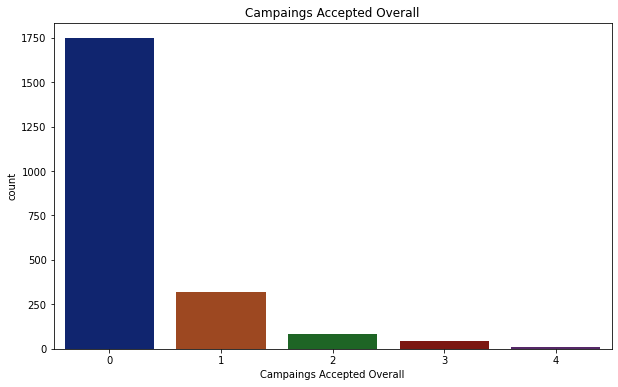

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
sns.countplot(x = data.AcceptedCmpOverall, ax = ax,  palette = 'dark')
plt.xlabel('Campaings Accepted Overall')
plt.title('Campaings Accepted Overall')

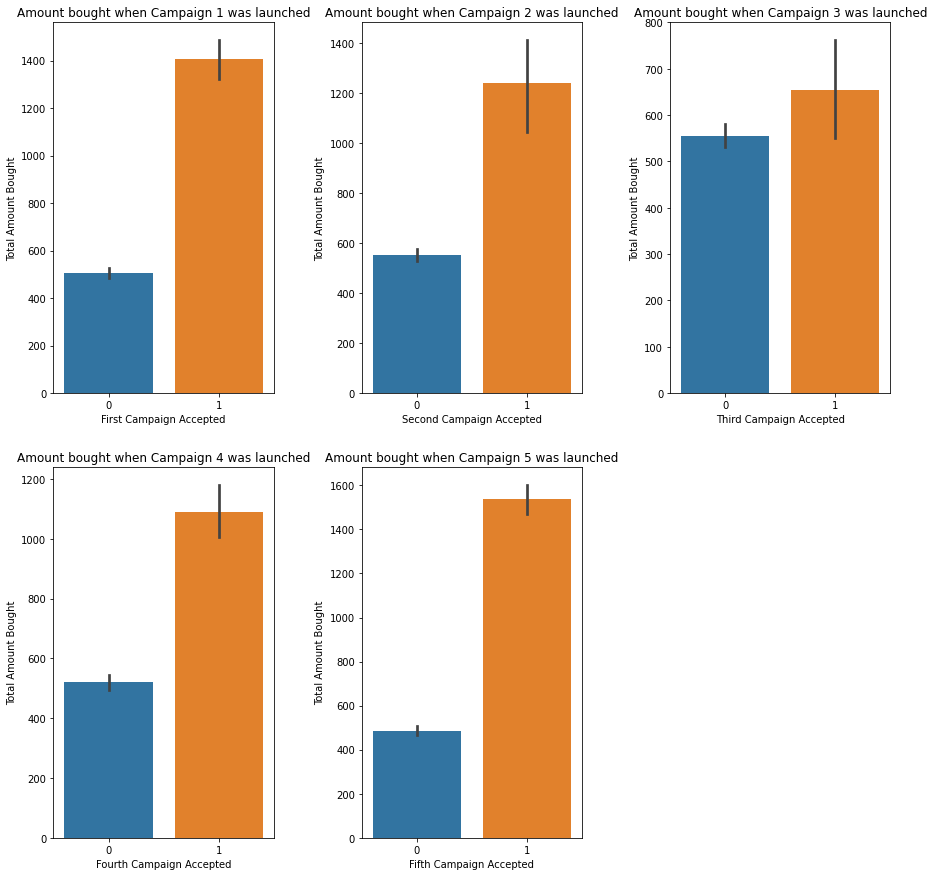

In [ ]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(2,3,1)
sns.barplot(x = data.AcceptedCmp1, y = data.MntTotal, ax = ax1)
plt.xlabel('First Campaign Accepted')
plt.ylabel('Total Amount Bought')
plt.title('Amount bought when Campaign 1 was launched')
ax2 = fig.add_subplot(2,3,2)
sns.barplot(x = data.AcceptedCmp2, y = data.MntTotal, ax = ax2)
plt.xlabel('Second Campaign Accepted')
plt.ylabel('Total Amount Bought')
plt.title('Amount bought when Campaign 2 was launched')
ax3 = fig.add_subplot(2,3,3)
sns.barplot(x = data.AcceptedCmp3, y = data.MntTotal, ax = ax3)
plt.xlabel('Third Campaign Accepted')
plt.ylabel('Total Amount Bought')
plt.title('Amount bought when Campaign 3 was launched')
ax4 = fig.add_subplot(2,3,4)
sns.barplot(x = data.AcceptedCmp4, y = data.MntTotal, ax = ax4)
plt.xlabel('Fourth Campaign Accepted')
plt.ylabel('Total Amount Bought')
plt.title('Amount bought when Campaign 4 was launched')
ax5 = fig.add_subplot(2,3,5)
sns.barplot(x = data.AcceptedCmp5, y = data.MntTotal, ax = ax5)
plt.xlabel('Fifth Campaign Accepted')
plt.ylabel('Total Amount Bought')
plt.title('Amount bought when Campaign 5 was launched')
plt.subplots_adjust(wspace = 0.4)

Answer: First campaign was the most accepted campaign overall but campaing 5 helped to sell more products, compared to the four others.

## Hypothesis 4: Does education matter when it comes to what purchases a person makes?

In [ ]:
b = 0
g = 0
m = 0 
p = 0
di = {b : 'Basic',  g:'Bachelors', m:'Master', p:'PhD'}
for i in range(0,len(data)):
  if data.education_Basic[i] == 1:
    b += 1
  elif data.education_Graduation[i] == 1:
    g += 1 
  elif data.education_Master[i] == 1:
    m += 1
  elif data.education_PhD[i] == 1:
    p += 1
ed = [b, g, m, p]
name = ['Basic education','Bachelors degree', 'Masters degree', 'PhD degree']
fig = px.pie( data_frame = data, values= ed, names= name, title='Percentage of education of each customer')
fig.show()

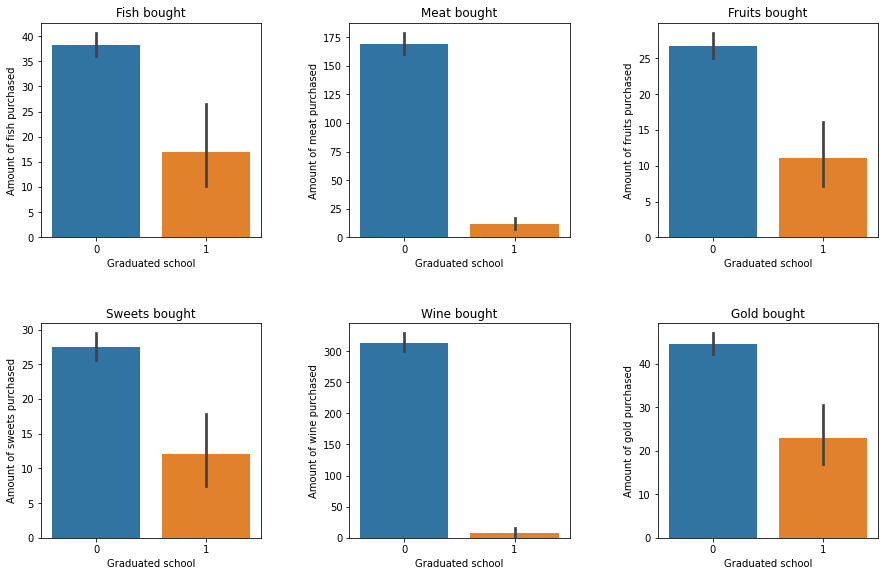

In [ ]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,3,1)
sns.barplot(x = 'education_Basic', y = 'MntFishProducts',ax = ax1, data = data)
plt.xlabel('Graduated school')
plt.ylabel('Amount of fish purchased')
plt.title('Fish bought')

ax2 = fig.add_subplot(3,3,2)
sns.barplot(x = 'education_Basic', y = 'MntMeatProducts',ax = ax2, data = data)
plt.xlabel('Graduated school')
plt.ylabel('Amount of meat purchased')
plt.title('Meat bought')

ax3 = fig.add_subplot(3,3,3)
sns.barplot(x = 'education_Basic', y = 'MntFruits', ax = ax3, data = data)
plt.xlabel('Graduated school')
plt.ylabel('Amount of fruits purchased')
plt.title('Fruits bought')

ax4 = fig.add_subplot(3,3,4)
sns.barplot(x = 'education_Basic', y = 'MntSweetProducts', ax = ax4, data = data)
plt.xlabel('Graduated school')
plt.ylabel('Amount of sweets purchased')
plt.title('Sweets bought')

ax5 = fig.add_subplot(3,3,5)
sns.barplot(x = 'education_Basic', y='MntWines', ax = ax5, data = data)
plt.xlabel('Graduated school')
plt.ylabel('Amount of wine purchased')
plt.title('Wine bought')

ax6 = fig.add_subplot(3,3,6)
sns.barplot(x = 'education_Basic', y = 'MntGoldProds',ax = ax6, data = data)
plt.xlabel('Graduated school')
plt.ylabel('Amount of gold purchased')
plt.title('Gold bought')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

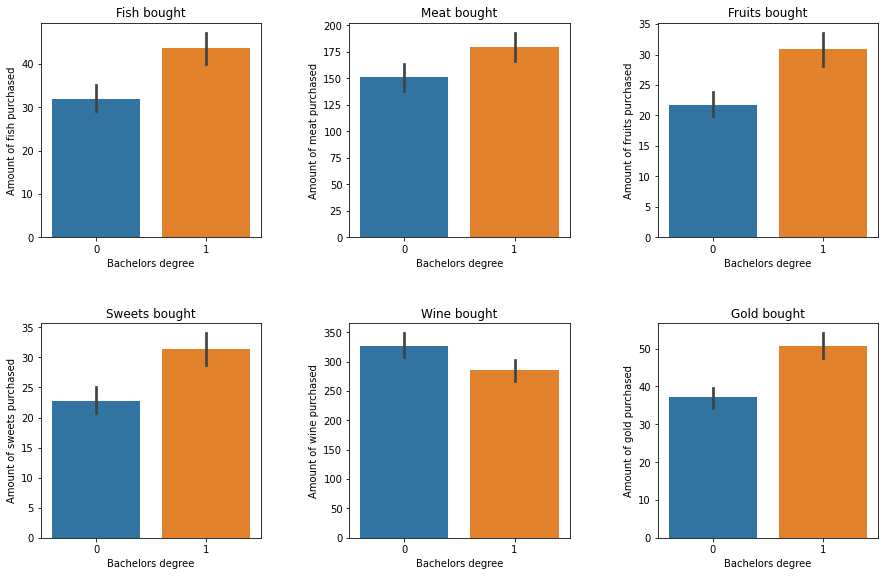

In [ ]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,3,1)
sns.barplot(x = 'education_Graduation', y = 'MntFishProducts',ax = ax1, data = data)
plt.xlabel('Bachelors degree')
plt.ylabel('Amount of fish purchased')
plt.title('Fish bought')

ax2 = fig.add_subplot(3,3,2)
sns.barplot(x = 'education_Graduation', y = 'MntMeatProducts',ax = ax2, data = data)
plt.xlabel('Bachelors degree')
plt.ylabel('Amount of meat purchased')
plt.title('Meat bought')

ax3 = fig.add_subplot(3,3,3)
sns.barplot(x = 'education_Graduation', y = 'MntFruits', ax = ax3, data = data)
plt.xlabel('Bachelors degree')
plt.ylabel('Amount of fruits purchased')
plt.title('Fruits bought')

ax4 = fig.add_subplot(3,3,4)
sns.barplot(x = 'education_Graduation', y = 'MntSweetProducts', ax = ax4, data = data)
plt.xlabel('Bachelors degree')
plt.ylabel('Amount of sweets purchased')
plt.title('Sweets bought')

ax5 = fig.add_subplot(3,3,5)
sns.barplot(x = 'education_Graduation', y='MntWines', ax = ax5, data = data)
plt.xlabel('Bachelors degree')
plt.ylabel('Amount of wine purchased')
plt.title('Wine bought')

ax6 = fig.add_subplot(3,3,6)
sns.barplot(x = 'education_Graduation', y = 'MntGoldProds',ax = ax6, data = data)
plt.xlabel('Bachelors degree')
plt.ylabel('Amount of gold purchased')
plt.title('Gold bought')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

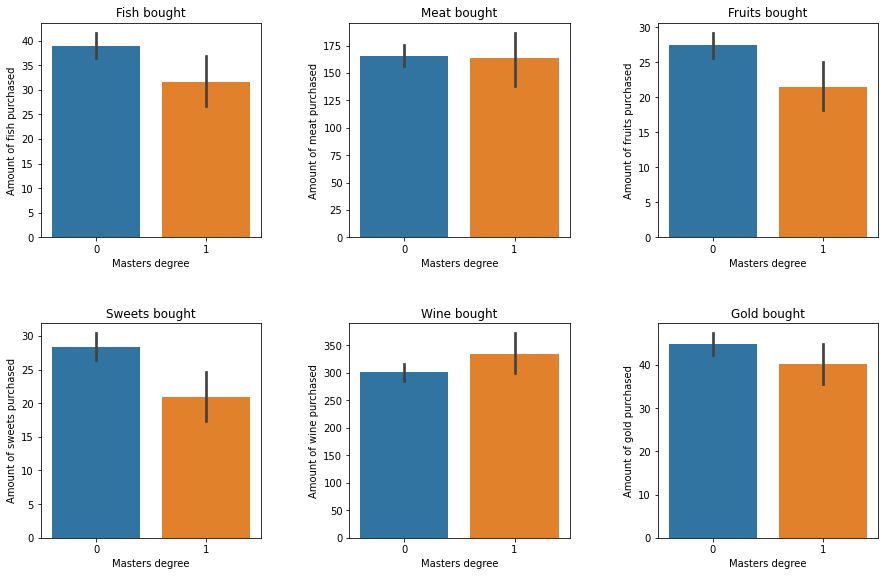

In [ ]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,3,1)
sns.barplot(x = 'education_Master', y = 'MntFishProducts',ax = ax1, data = data)
plt.xlabel('Masters degree')
plt.ylabel('Amount of fish purchased')
plt.title('Fish bought')

ax2 = fig.add_subplot(3,3,2)
sns.barplot(x = 'education_Master', y = 'MntMeatProducts',ax = ax2, data = data)
plt.xlabel('Masters degree')
plt.ylabel('Amount of meat purchased')
plt.title('Meat bought')

ax3 = fig.add_subplot(3,3,3)
sns.barplot(x = 'education_Master', y = 'MntFruits', ax = ax3, data = data)
plt.xlabel('Masters degree')
plt.ylabel('Amount of fruits purchased')
plt.title('Fruits bought')

ax4 = fig.add_subplot(3,3,4)
sns.barplot(x = 'education_Master', y = 'MntSweetProducts', ax = ax4, data = data)
plt.xlabel('Masters degree')
plt.ylabel('Amount of sweets purchased')
plt.title('Sweets bought')

ax5 = fig.add_subplot(3,3,5)
sns.barplot(x = 'education_Master', y='MntWines', ax = ax5, data = data)
plt.xlabel('Masters degree')
plt.ylabel('Amount of wine purchased')
plt.title('Wine bought')

ax6 = fig.add_subplot(3,3,6)
sns.barplot(x = 'education_Master', y = 'MntGoldProds',ax = ax6, data = data)
plt.xlabel('Masters degree')
plt.ylabel('Amount of gold purchased')
plt.title('Gold bought')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

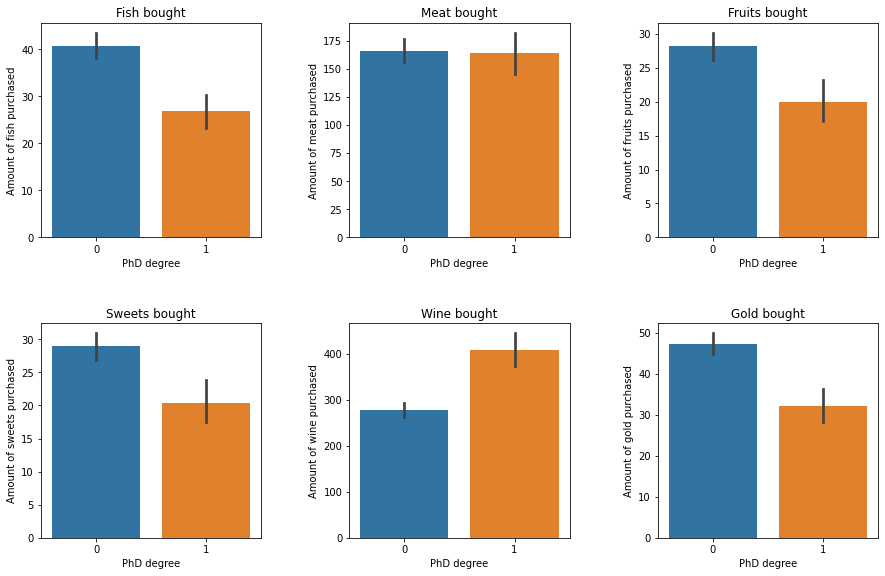

In [ ]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,3,1)
sns.barplot(x = 'education_PhD', y = 'MntFishProducts',ax = ax1, data = data)
plt.xlabel('PhD degree')
plt.ylabel('Amount of fish purchased')
plt.title('Fish bought')

ax2 = fig.add_subplot(3,3,2)
sns.barplot(x = 'education_PhD', y = 'MntMeatProducts',ax = ax2, data = data)
plt.xlabel('PhD degree')
plt.ylabel('Amount of meat purchased')
plt.title('Meat bought')

ax3 = fig.add_subplot(3,3,3)
sns.barplot(x = 'education_PhD', y = 'MntFruits', ax = ax3, data = data)
plt.xlabel('PhD degree')
plt.ylabel('Amount of fruits purchased')
plt.title('Fruits bought')

ax4 = fig.add_subplot(3,3,4)
sns.barplot(x = 'education_PhD', y = 'MntSweetProducts', ax = ax4, data = data)
plt.xlabel('PhD degree')
plt.ylabel('Amount of sweets purchased')
plt.title('Sweets bought')

ax5 = fig.add_subplot(3,3,5)
sns.barplot(x = 'education_PhD', y='MntWines', ax = ax5, data = data)
plt.xlabel('PhD degree')
plt.ylabel('Amount of wine purchased')
plt.title('Wine bought')

ax6 = fig.add_subplot(3,3,6)
sns.barplot(x = 'education_PhD', y = 'MntGoldProds',ax = ax6, data = data)
plt.xlabel('PhD degree')
plt.ylabel('Amount of gold purchased')
plt.title('Gold bought')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Answer: Educational background plays a major part in what purchases are made. It can be seen above that wine bought increases when the educational background increases. Also, people who have a bachelors degree tend to buy more gold. To conclude, people who have only finished school have a very low consuption of all products compared to people with higher educational background.

## Hypothesis 5:  Does income correlates with what purchases are made? 

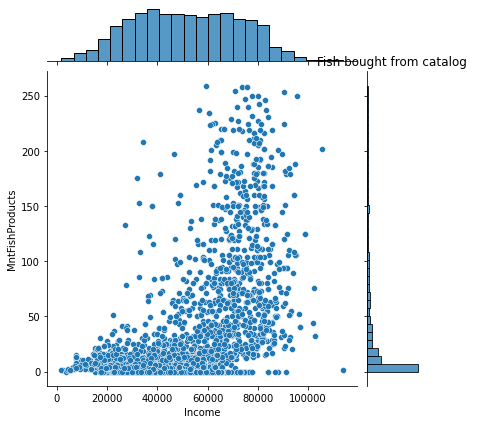

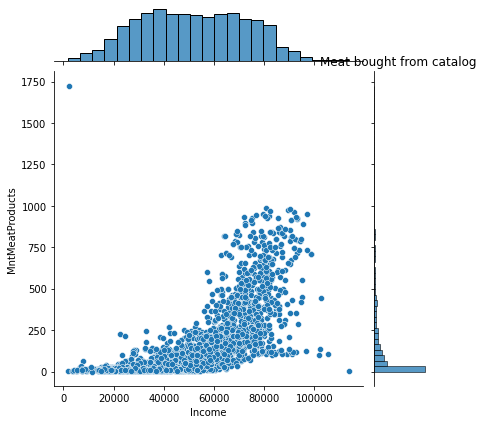

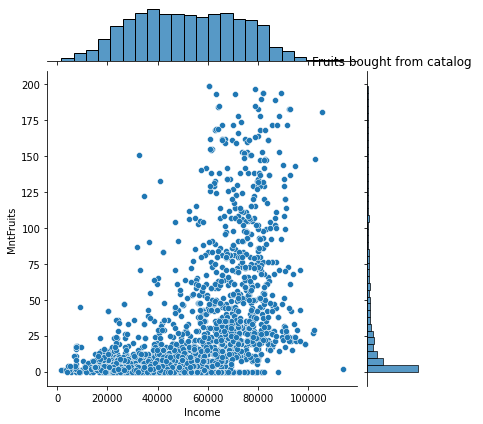

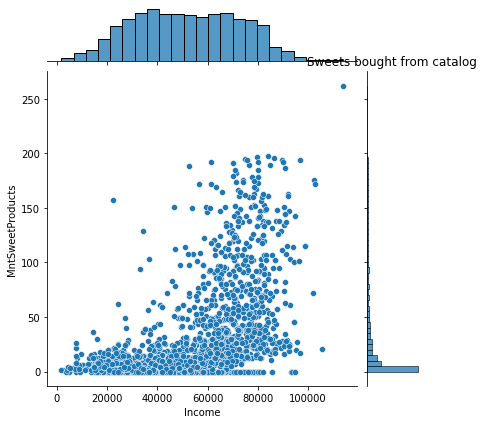

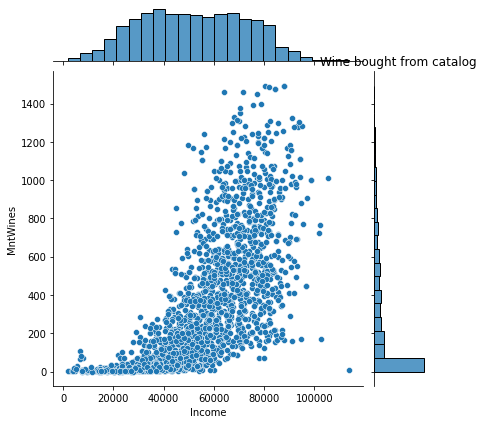

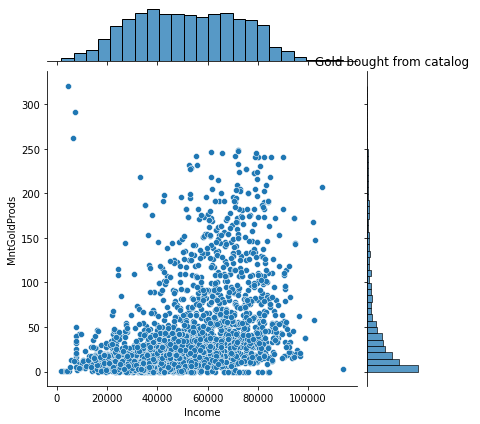

In [ ]:
sns.jointplot(x = 'Income', y = 'MntFishProducts', data = data)
plt.xlabel('Catalog Purchases')
plt.ylabel('Amount of fish purchased')
plt.title('Fish bought from catalog ')
plt.show()

sns.jointplot(x = 'Income', y = 'MntMeatProducts', data = data)
plt.xlabel('Catalog Purchases')
plt.ylabel('Amount of meat purchased')
plt.title('Meat bought from catalog ')
plt.show()

sns.jointplot(x = 'Income', y = 'MntFruits', data = data)
plt.xlabel('Catalog Purchases')
plt.ylabel('Amount of fruits purchased')
plt.title('Fruits bought from catalog ')
plt.show()

sns.jointplot(x = 'Income', y = 'MntSweetProducts', data = data)
plt.xlabel('Catalog Purchases')
plt.ylabel('Amount of sweets purchased')
plt.title('Sweets bought from catalog ')
plt.show()

sns.jointplot(x = 'Income', y='MntWines', data = data)
plt.xlabel('Catalog Purchases')
plt.ylabel('Amount of wine purchased')
plt.title('Wine bought from catalog ')
plt.show()

sns.jointplot(x = 'Income', y = 'MntGoldProds', data = data)
plt.xlabel('Catalog Purchases')
plt.ylabel('Amount of gold purchased')
plt.title('Gold bought from catalog ')
plt.show()

Answer: as concluded from above, the higher the income the more the amount bought from all products, especially wine, fish and fruits.

##Conclusions
This projects highlights the importance of Exploratory Data Analysis. It can help to make deals more targeted, to improve future campaigns etc.